In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mtcars.csv')

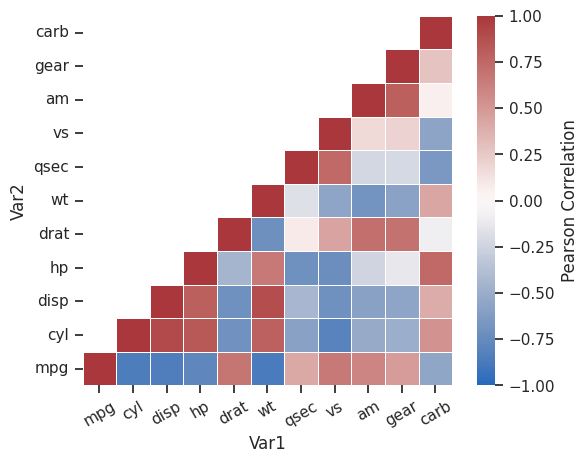

In [143]:
corr_df = df.corr(numeric_only=True)
corr = corr_df.where(np.triu(np.ones(corr_df.shape)).astype(bool))
ax = sns.heatmap(corr, annot=False, cmap="vlag", square=True, linewidths=0.7, vmax=1, vmin=-1, cbar_kws={'label': 'Pearson Correlation'})
ax.set(xlabel="Var1", ylabel="Var2")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.invert_yaxis()
ax.tick_params(axis='x', rotation=30)

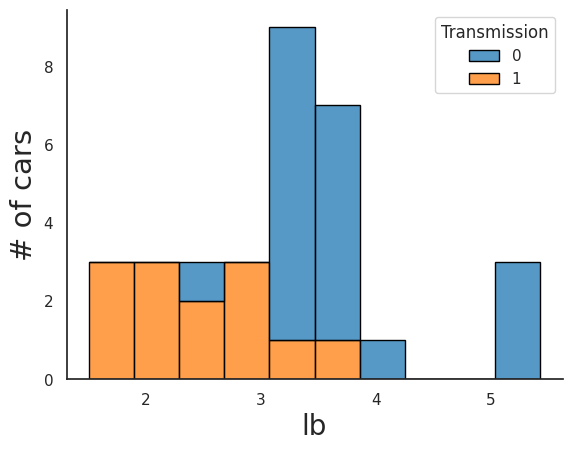

In [312]:
weight_df = df[['wt', 'am']].copy()
weight_df.rename(columns = {'wt': 'lb', 'am' : 'Transmission'}, inplace=True)
ax = sns.histplot(weight_df, x='lb', hue='Transmission', multiple='stack', edgecolor='black', palette='tab10', bins=10)
ax.set_xlabel('lb', fontdict={'size': 20})
ax.set_ylabel('# of cars', fontdict={'size': 21})
ax.set_yticks([0, 2, 4, 6, 8])
ax.set_xticks([2, 3, 4, 5])
sns.despine()

In [10]:
jjj = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

In [11]:
np.pad(jjj, (1, 1))

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])